# Práctica 3: Aprendizaje automático supervisado

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjuntos de datos y aprender a interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 08__

__Nombres de los estudiantes: Lubin Ye y Ziteng Huang__

In [2]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Apartado 2: Clasificación

In [4]:
RANDOM_STATE=83

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene una enfermedad cardiovacular o no.

Crea un dataframe a partir del fichero `heart_failure.csv` que se proporciona junto con la práctica. Antes de nada, elimina las filas con valores nulos.



In [5]:
import pandas as pd

# Lee el archivo CSV y crea el DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab/P3/heart_failure.csv")

# Muestra las primeras filas del DataFrame
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


**Descripción de los datos:**

Age: edad <br/>
Sex: sexo <br/>
ChestPainType: tipo de dolor de pecho <br/>
RestingBP: Presión sanguínea <br/>
Cholesterol: colesterol <br/>
FastingBS: Azúcar en sangre <br/>
RestingECG: Electrodiagrama del corazón, mide la actividad eléctrica del mismo <br/>
MaxHR: Máximo de latidos por minuto <br/>
ExerciseAngina: Dolor de pecho causado por el ejercicio <br/>
OldPeak: ST depression induced by exercise relative to rest <br/>
ST_Slope: The ST segment shift relative to exercise-induced increments in heart rate <br/>
HeartDisease (**Class**): Enfermedad el corazón <br/>


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.



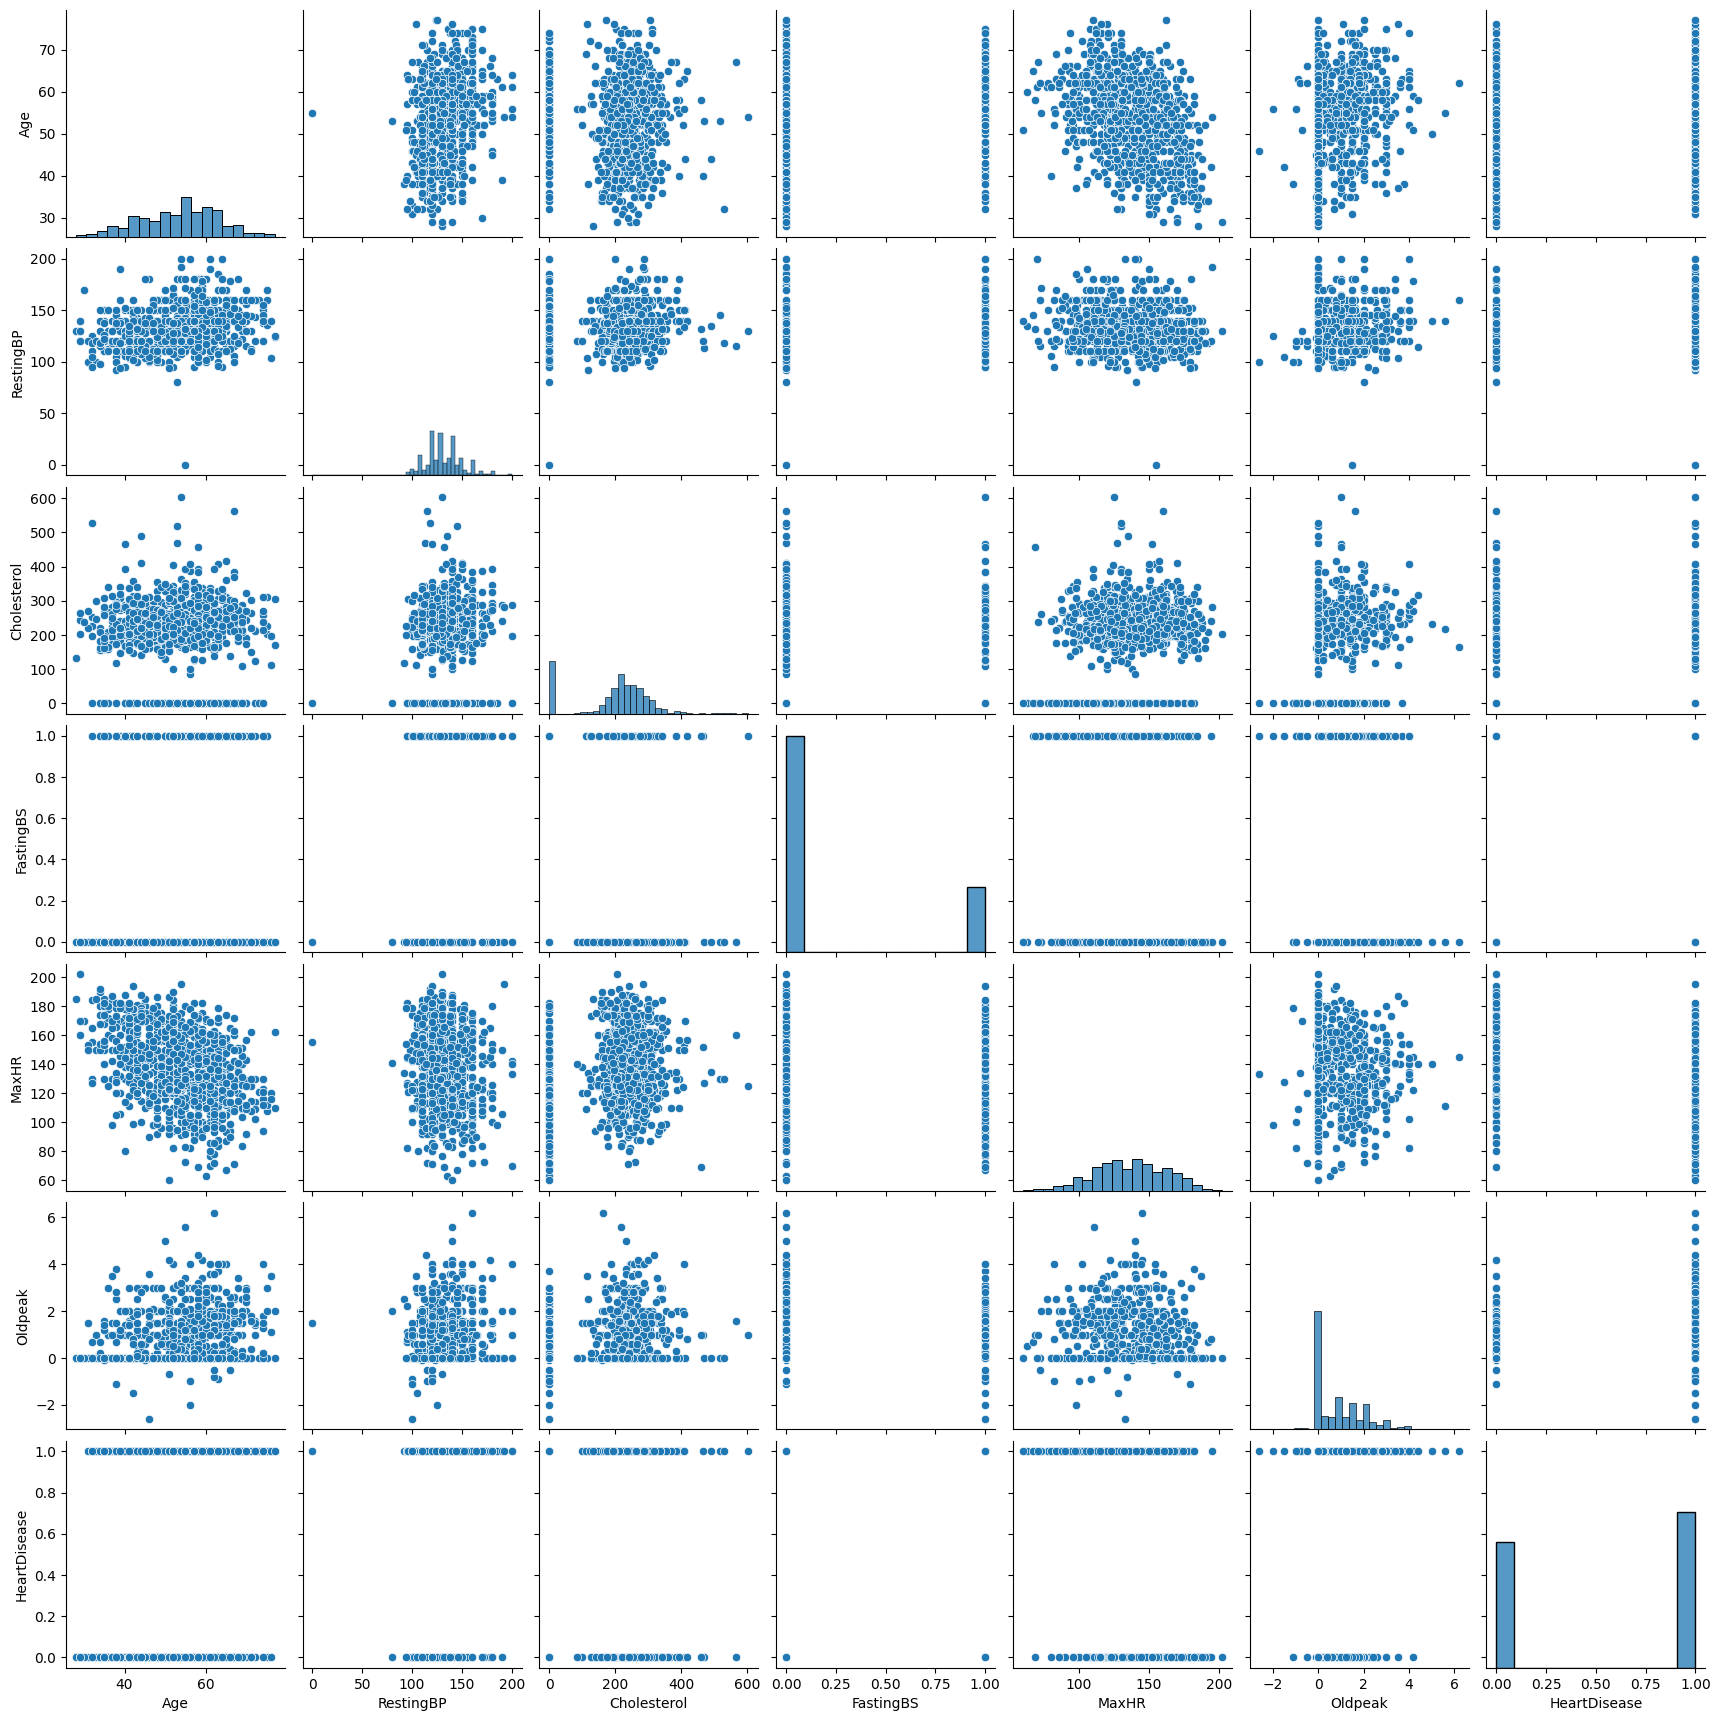

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


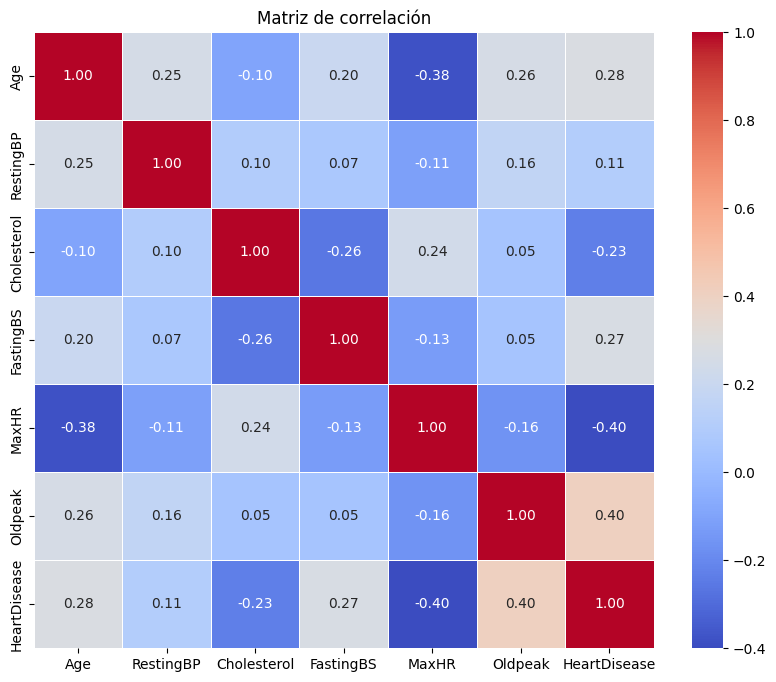

In [6]:
# 2.1

dfNum = df.copy()

# Descripción de variables
dfNum.describe()

import seaborn as sns
import matplotlib.pyplot as plt

dfNum.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], inplace=True)

# Diagramas de dispersión para pares de variables
sns.pairplot(dfNum)
plt.show()

correlation_matrix = dfNum.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


**2.**


Dado que tenemos aproximadamente 400 muestras correspondientes a la clase negativa y 500 muestras correspondientes a la clase positiva (Heart Disease), podemos ver que hay una diferencia de 100 muestras entre ambas clases. Aunque esta diferencia no es insignificante, tampoco es extremadamente grande en proporción al tamaño total del conjunto de datos. Por lo tanto, podríamos concluir que las clases están relativamente equilibradas, especialmente en comparación con conjuntos de datos donde la diferencia entre las clases es mucho mayor.

**2.1 Análisis de variables numéricas** <br/>

Al analizar las variables numéricas, observamos lo siguiente:

Edad (Age): La edad de los pacientes oscila entre alrededor de 29 y 77 años, con una media de aproximadamente 54 años. <br/>
Presión arterial en reposo (RestingBP): La presión arterial en reposo varía en un rango bastante estrecho, con una media cercana a 131 mm Hg. <br/>
Colesterol (Cholesterol): Los niveles de colesterol muestran una mayor variabilidad, con valores que van desde alrededor de 126 hasta 564 mg/dl, y una media de aproximadamente 246 mg/dl. <br/>
Azúcar en ayunas (FastingBS): La mayoría de los pacientes tienen niveles normales de azúcar en ayunas (0), pero hay una cantidad significativa con niveles elevados (1). <br/>
Ritmo cardíaco máximo alcanzado (MaxHR): El ritmo cardíaco máximo varía entre alrededor de 71 y 202 latidos por minuto, con una media de aproximadamente 150 latidos por minuto. <br/>
Depresión del segmento ST inducida por el ejercicio (Oldpeak): La depresión del segmento ST inducida por el ejercicio oscila entre alrededor de -2.6 y 6.2, con una media cercana a 1. <br/>
Enfermedad cardíaca (HeartDisease): La variable de enfermedad cardíaca es binaria (0 o 1), donde 1 indica la presencia de enfermedad cardíaca y 0 su ausencia. <br/>

Vemos que en general todos los datos tienen una correlación baja entre los mismos, ya que todos los coeficientes de relación son menores que 0.40 (en valor absoluto). No obstante, si tuvieramos que decir alguna, las variables que más correlacionan con la enfermedad cardíaca son la edad, la depresión del segmento ST inducida por el ejercicio (Oldpeak) y el ritmo cardíaco máximo alcanzado (MaxHR).

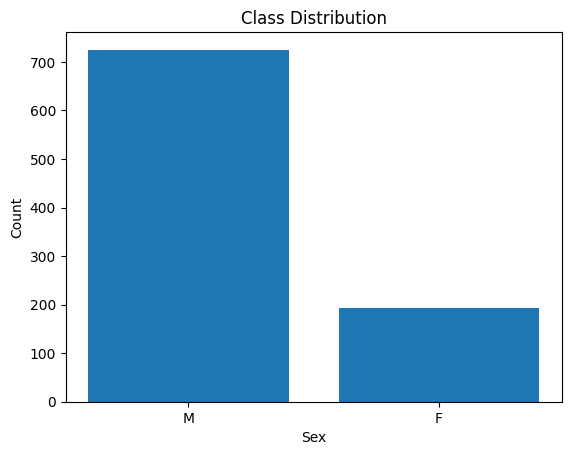

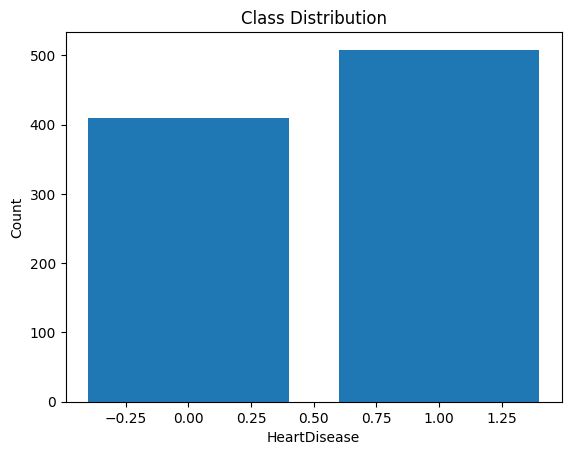

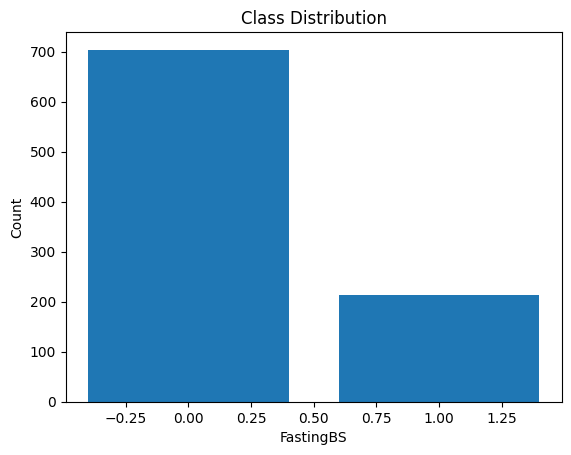

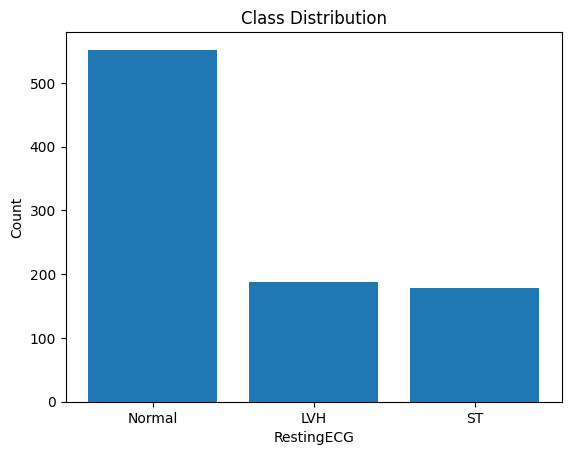

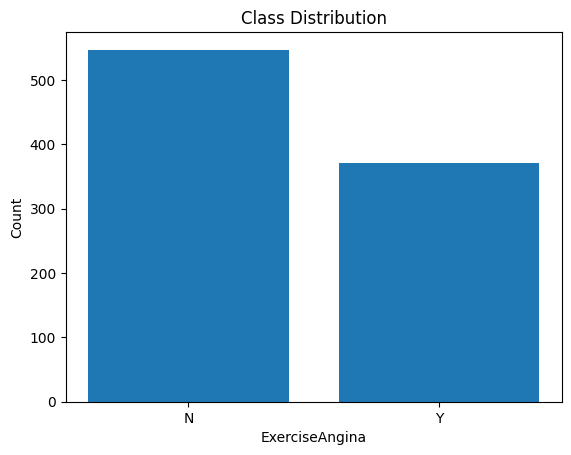

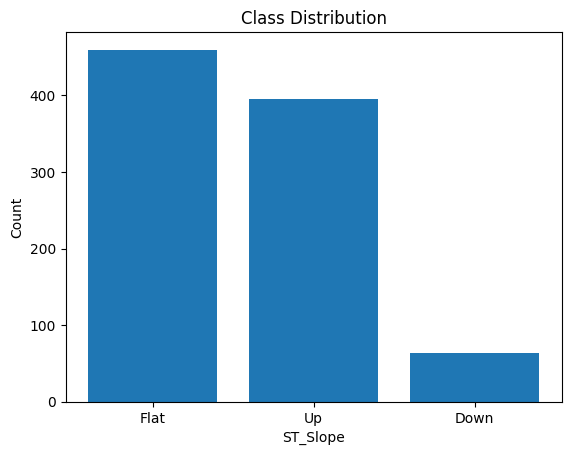

In [7]:
# 2.2

import matplotlib.pyplot as plt

# Lista de columnas de interés
columns_of_interest = ['Sex', 'HeartDisease', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Iterar sobre las columnas de interés
for column in columns_of_interest:
    # Contar las ocurrencias de cada clase
    class_counts = df[column].value_counts()

    # Plotear la distribución de clases
    plt.bar(class_counts.index, class_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()



**2.2 Análisis de variables categóricas** <br/>
La distribución de los valores de las variables categóricas muestra que la mayoría de los pacientes son de sexo masculino (M), tienen un electrocardiograma en reposo clasificado como "Normal" o tiene un azúcar en sangre "0" (FastingBS). <br/>
Vemos que en relación las variables sexo, FastingBS, RestingECG y ST_Slope, los individuos no tienen equilibrio ya que la cantidad de individuos agrupada en dichas categorías difiere bastante entre sí. <br/>
En cuanto al resto de variables, podemos decir que los individuos están bien equilibrados.

## 3) Separa los datos en entrenamiento y test

Ajusta cada modelo de aprendizaje con los datos de entrenamiento y da una evaluación final con los datos de test.


In [8]:
# Importar las clases y funciones necesarias de las bibliotecas sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copiar el DataFrame original para preservarlo
dfNum = df.copy()

# Crear una instancia de LabelEncoder para codificar variables categóricas
label_encoder = LabelEncoder()

# Codificar las variables categóricas 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' a valores numéricos
dfNum['Sex'] = label_encoder.fit_transform(df['Sex'])
dfNum['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
dfNum['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
dfNum['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
dfNum['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

# Crear una instancia de MinMaxScaler para escalar los datos al rango [0,1]
scaler = MinMaxScaler()

# Ajustar el scaler a los datos y escalar los datos en dfNum
scaler.fit(dfNum)
dfNum = scaler.transform(dfNum)  # Reemplazar los datos originales con los escalados
dfNum = pd.DataFrame(dfNum, columns=df.columns)  # Convertir el array NumPy resultante en un DataFrame de pandas

# Rellenar los valores faltantes con ceros
dfNum.fillna(0, inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
# Seleccionar ciertas características (X) y la variable objetivo (y)
# El 20% de los datos se usará como conjunto de prueba, asegurando la proporción de clases similar en ambos conjuntos y fijando una semilla aleatoria para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(dfNum[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']], dfNum['HeartDisease'], test_size=0.20, stratify=dfNum['HeartDisease'], random_state=RANDOM_STATE)


## 4) Árboles de decisión

Aplica árboles de decisión para resolver el problema.


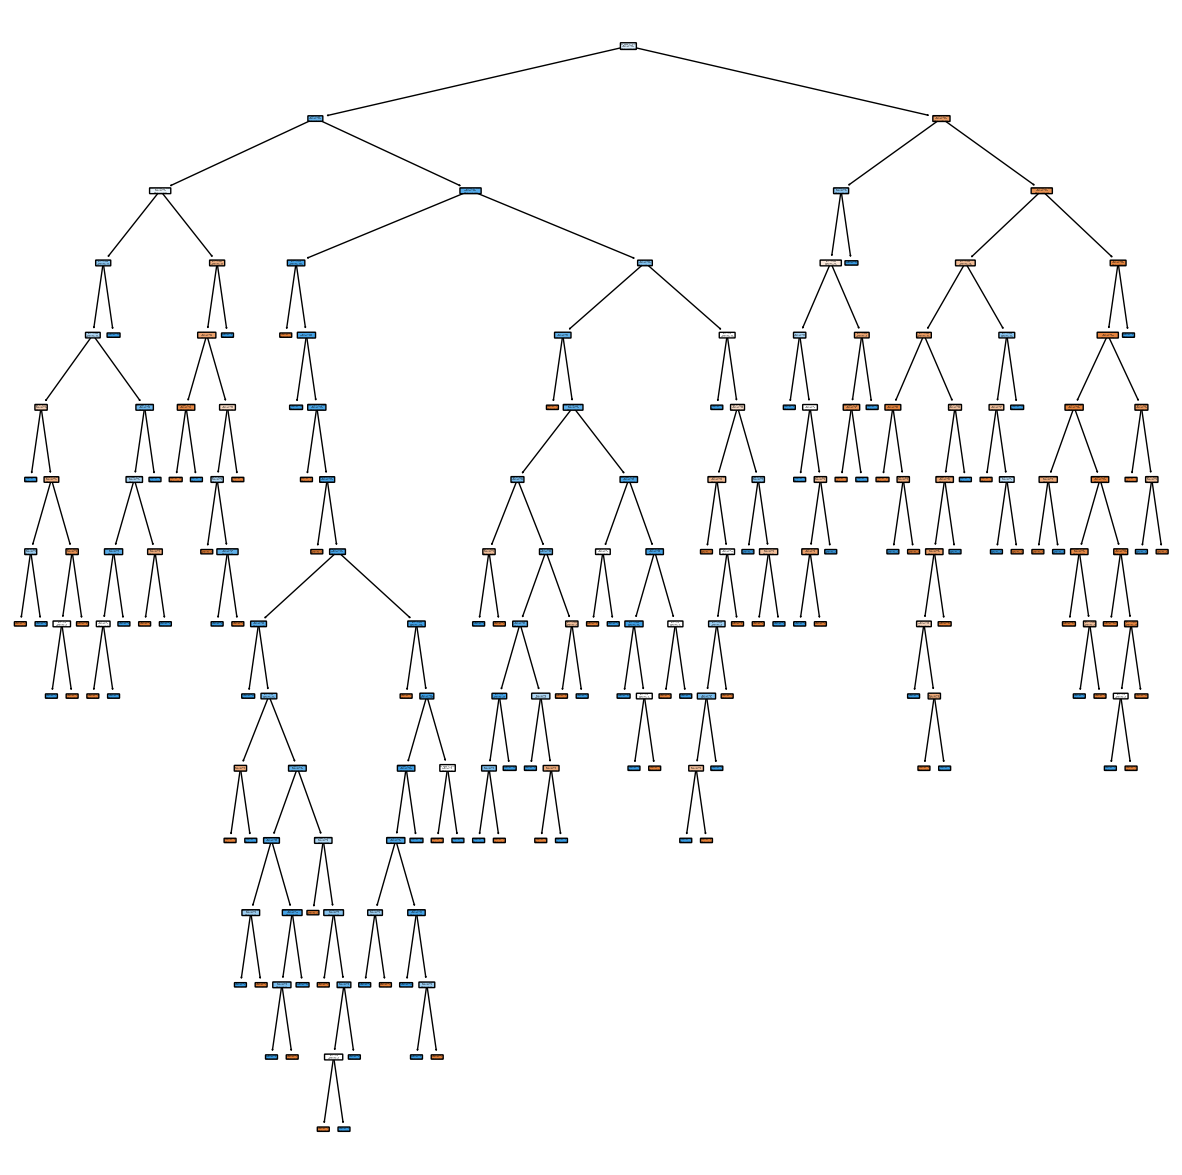

Precisión del modelo: 0.8043478260869565
Puntaje F1 del modelo: 0.826923076923077


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train.values, y_train)

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=X_train.columns.to_list(), rounded=True)
plt.show()

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test.values)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Calcular el puntaje F1 del modelo
f1 = f1_score(y_test, y_pred)
print("Puntaje F1 del modelo:", f1)

### 4.1) Preprocesamiento de los datos

Decide si es conveniente preprocesar los datos de alguna manera. Justifica tu respuesta.

Basándonos en los datos proporcionados y en el análisis realizado previamente, podemos considerar algunas acciones de preprocesamiento de datos:

1. **Manejo de valores faltantes**: podríamos examinar si hay valores faltantes en los datos y rellenarlos con 0.

2. **Codificación de variables categóricas**: necesitaríamos asegurarnos de que las variables categóricas "Sex", "RestingECG", "ChestPainType" y "ExerciseAngina" estén codificadas de manera adecuada para su uso en el modelo de aprendizaje automático. Esto podría implicar convertirlas en variables binarias o utilizar técnicas de codificación como la codificación one-hot.

3. **Normalización de variables numéricas**: Aunque no vemos diferencias extremas en las escalas de las variables numéricas, la normalización puede ayudar a mejorar la convergencia del modelo, especialmente si se utilizan algoritmos sensibles a la escala, como la regresión logística. La normalización podría realizarse utilizando técnicas como la escala min-max o la estandarización.

De esta manera, el preprocesamiento podría ser beneficioso para mejorar la calidad de los datos y aumentar la eficacia del modelo de aprendizaje. Esto ya lo hemos hecho en el apartado 3)

### 4.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes.

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.


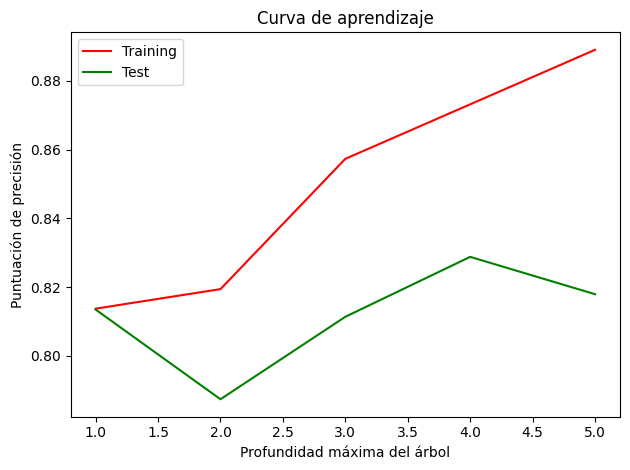

In [10]:
from sklearn.model_selection import cross_validate
import numpy as np

# Lista para almacenar la precisión del entrenamiento
train_accuracy = []

# Lista para almacenar la precisión de la prueba
test_accuracy = []

# Características a considerar para el entrenamiento del modelo
features = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

# Definir rangos de profundidades máximas del árbol
max_depths = range(1, 6)

# Iterar sobre cada profundidad máxima
for md in max_depths:
    # Crear un clasificador de árbol de decisión con la profundidad máxima actual
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)

    # Realizar validación cruzada para evaluar el rendimiento del clasificador
    scores = cross_validate(clf, dfNum[features], dfNum['HeartDisease'], scoring='accuracy', cv=10, return_train_score=True)

    # Calcular la precisión media en el conjunto de entrenamiento y agregarla a la lista
    train_accuracy.append(np.mean(scores['train_score']))

    # Calcular la precisión media en el conjunto de prueba y agregarla a la lista
    test_accuracy.append(np.mean(scores['test_score']))

# Graficar la curva de aprendizaje
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Configurar el título y etiquetas de los ejes
plt.title("Curva de aprendizaje")
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Puntuación de precisión")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


Basándonos en la curva de aprendizaje que hemos proporcionado, podemos hacer algunas observaciones sobre cómo varía el comportamiento del clasificador en entrenamiento y validación a medida que cambia el valor del parámetro (profundidad máxima del árbol):

1. **Entrenamiento (Training)**:
   - La puntuación de precisión aumenta gradualmente a medida que aumenta la profundidad máxima del árbol.
   - El rendimiento del modelo en los datos de entrenamiento mejora a medida que permitimos que el árbol se vuelva más profundo.
   - Sin embargo, observamos una ligera disminución en la puntuación de precisión cuando la profundidad máxima del árbol alcanza el valor de 4.

2. **Validación (Test)**:
   - La puntuación de precisión aumenta inicialmente a medida que aumenta la profundidad máxima del árbol.
   - Sin embargo, después de alcanzar un punto máximo alrededor de la profundidad máxima del árbol de 3 o 4, la puntuación de precisión comienza a disminuir o se estabiliza.
   - Esto sugiere que el modelo comienza a sobreajustarse a los datos de entrenamiento y no generaliza bien a nuevos datos a medida que el árbol se vuelve demasiado profundo.

Basándonos en estas observaciones, consideramos que el valor más adecuado para el parámetro de profundidad máxima del árbol sería 3 o 4. Estos valores parecen ofrecer un equilibrio entre un rendimiento aceptable en los datos de entrenamiento y una buena generalización a nuevos datos en el conjunto de validación. Además, evitarían el sobreajuste del modelo que se observa con profundidades máximas mayores.

### 4.3) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Crear y ajustar el clasificador de árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=2, random_state=RANDOM_STATE)
clf.fit(dfNum[features], dfNum['HeartDisease'])

# Predecir en los datos de entrenamiento
y_train_pred = clf.predict(dfNum[features])

# Calcular las métricas
precision = precision_score(dfNum['HeartDisease'], y_train_pred)
recall = recall_score(dfNum['HeartDisease'], y_train_pred)
f1 = f1_score(dfNum['HeartDisease'], y_train_pred)

precision, recall, f1

(0.8461538461538461, 0.9311023622047244, 0.8865979381443299)

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       410
         1.0       0.85      0.93      0.89       508

    accuracy                           0.87       918
   macro avg       0.87      0.86      0.86       918
weighted avg       0.87      0.87      0.87       918



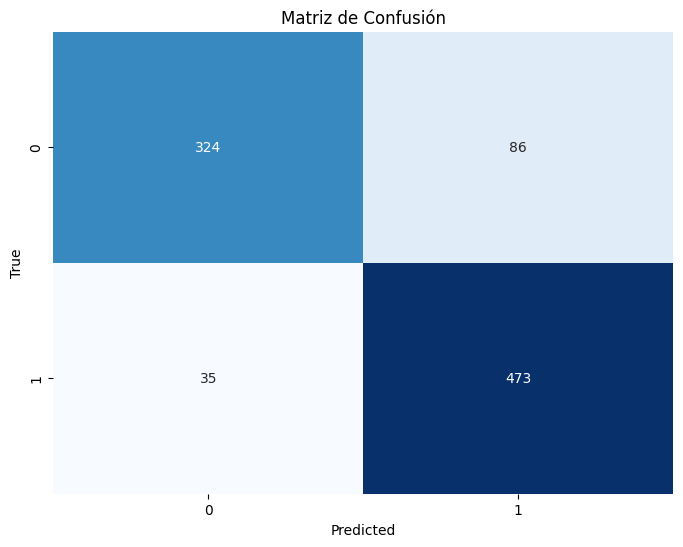

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Obtener el informe detallado
print(classification_report(dfNum['HeartDisease'], y_train_pred))

# Obtener la matriz de confusión
cm = confusion_matrix(dfNum['HeartDisease'], y_train_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()


Basándonos en los resultados obtenidos:

La precisión promedio del clasificador es del 84.62%, lo que significa que, en promedio, el 84.62% de las muestras clasificadas como positivas son realmente positivas.
La exhaustividad (recall) promedio del clasificador es del 93.11%, lo que indica que el clasificador identifica correctamente el 93.11% de todas las muestras positivas en el conjunto de datos.
El valor F1 promedio del clasificador es del 88.66%, que es una medida armónica de precisión y exhaustividad. Un valor F1 más alto indica un mejor equilibrio entre precisión y exhaustividad.
Al observar el informe detallado para cada clase y la matriz de confusión, podemos ver que:

Para la clase 0 (indicando la ausencia de enfermedad cardíaca), el clasificador tiene una precisión del 90%, lo que significa que el 90% de las muestras clasificadas como ausencia de enfermedad cardíaca son realmente negativas. Sin embargo, la exhaustividad es del 79%, lo que indica que el clasificador identifica correctamente el 79% de todas las muestras que son realmente negativas.
Para la clase 1 (indicando la presencia de enfermedad cardíaca), el clasificador tiene una precisión del 85%, lo que significa que el 85% de las muestras clasificadas como presencia de enfermedad cardíaca son realmente positivas. La exhaustividad es del 93%, lo que indica que el clasificador identifica correctamente el 93% de todas las muestras que son realmente positivas.
En general, el clasificador parece tener un buen rendimiento con una precisión global del 87%. Sin embargo, es importante considerar cómo se equilibran la precisión y la exhaustividad dependiendo del contexto del problema y las necesidades específicas de la aplicación.

En cuanto a la fiabilidad y utilidad en una empresa real, el clasificador basado en árboles de decisión podría ser valioso en la detección de enfermedades cardíacas, especialmente debido a su capacidad para proporcionar explicaciones interpretables sobre las decisiones de clasificación. Sin embargo, es importante realizar una validación adicional en conjuntos de datos independientes y considerar otros factores, como la aceptabilidad clínica y la rentabilidad, para evaluar completamente su utilidad en un entorno empresarial real.

El análisis de la fiabilidad de un clasificador se puede basar en varios factores, incluyendo la precisión, exhaustividad y valor F1, así como la interpretación de la matriz de confusión. Además, la fiabilidad de un clasificador puede depender del contexto específico del problema y de los requisitos del negocio.

Los árboles de decisión tienen varias ventajas, como su interpretabilidad y capacidad para manejar datos tanto numéricos como categóricos. Sin embargo, también tienen algunas limitaciones, como la tendencia al sobreajuste en conjuntos de datos complejos y la sensibilidad a pequeñas variaciones en los datos de entrada. En el contexto de un problema de diagnóstico de enfermedades cardíacas, un clasificador basado en árboles de decisión podría ser útil para proporcionar una explicación clara de los factores que contribuyen a las predicciones y ayudar a los médicos en el proceso de toma de decisiones. Sin embargo, se requerirían más pruebas y validación en conjuntos de datos independientes para evaluar completamente su rendimiento y fiabilidad en un entorno empresarial real.

## 5) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values:
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, dfNum[features], dfNum['HeartDisease'], scoring='accuracy', cv=10)

    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.8115504061156236,
 0.8115504061156236,
 0.8245341614906833,
 0.831079789775442,
 0.8343287147634972,
 0.8408504538939321,
 0.8408385093167702,
 0.8429885332059245,
 0.8419015766841854,
 0.8440635451505016,
 0.8473602484472049,
 0.8440874343048257,
 0.848447204968944,
 0.846249402771142]

In [13]:
range(1,15)[accuracy_mean.index(max(accuracy_mean))] # Mejor valor de k

13

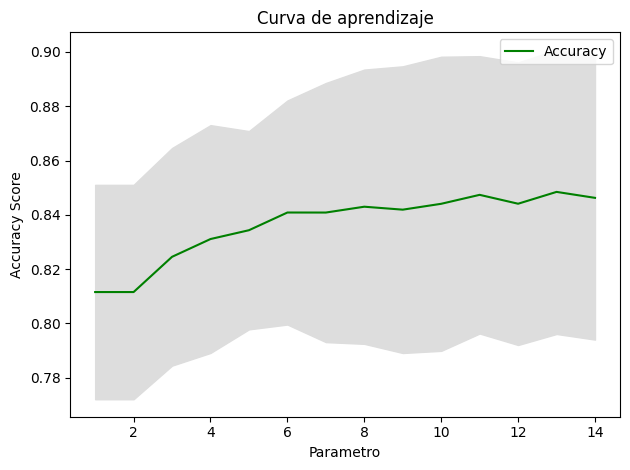

In [14]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dfNum[features], dfNum['HeartDisease'], test_size=0.2, random_state=42)

# Entrenar el clasificador KNN con la mejor k
best_k = 13
clf = KNeighborsClassifier(best_k, weights='distance')
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular precision, recall y F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83        77
         1.0       0.88      0.87      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## 6) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

    scores = cross_validate(mlp, dfNum[features], dfNum['HeartDisease'], scoring='accuracy', cv=10)

    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.839751552795031,
 0.838628762541806,
 0.8364548494983278,
 0.8364906832298136,
 0.8343287147634972,
 0.8354037267080745,
 0.831055900621118,
 0.8321428571428571,
 0.8288580984233158,
 0.832130912565695]

In [16]:
np.arange(0.1, 2.1, step=0.2)[accuracy_mean.index(max(accuracy_mean))] # Mejor valor del coeficiente de regularización

0.1

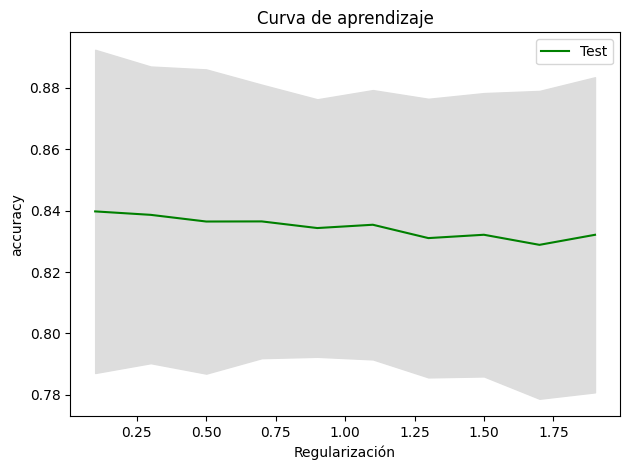

In [17]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dfNum[features], dfNum['HeartDisease'], test_size=0.2, random_state=42)

# Entrenar el clasificador MLP con la mejor configuración de regularización encontrada previamente
best_regul_param = 0.1  # Usando el mejor valor de regularización
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=best_regul_param, batch_size=100,
                    learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

mlp.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Calcular precision, recall y F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86        77
         1.0       0.95      0.83      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.89      0.88      0.88       184



## 7) Comparación de resultados

Muestra los resultados en test de los mejores modelos.
Discute cual es el mejor.


Para determinar cuál modelo es el mejor entre árboles de decisión, KNN (k-nearest neighbors) y MLP (Multi-Layer Perceptron) basado en los resultados de precision, recall y F1-score proporcionados, podemos analizar cada métrica y su significado:

Árboles de Decisión:

Precision para la clase 0: 0.90 <br/>
Recall para la clase 0: 0.79  <br/>
F1-score para la clase 0: 0.84  <br/>
Precision para la clase 1: 0.85  <br/>
Recall para la clase 1: 0.93  <br/>
F1-score para la clase 1: 0.89  <br/>
Accuracy: 0.87 <br/>

KNN:

Precision para la clase 0: 0.82 <br/>
Recall para la clase 0: 0.83 <br/>
F1-score para la clase 0: 0.83 <br/>
Precision para la clase 1: 0.88 <br/>
Recall para la clase 1: 0.87 <br/>
F1-score para la clase 1: 0.87 <br/>
Accuracy: 0.85 <br/>

MLP:

Precision para la clase 0: 0.80 <br/>
Recall para la clase 0: 0.94 <br/>
F1-score para la clase 0: 0.86 <br/>
Precision para la clase 1: 0.95 <br/>
Recall para la clase 1: 0.83 <br/>
F1-score para la clase 1: 0.89 <br/>
Accuracy: 0.88 <br/>

Análisis:

En términos de precisión y recall para ambas clases, el modelo MLP obtiene las mejores puntuaciones en general. Esto indica que el MLP tiene un buen equilibrio entre la capacidad de identificar correctamente las instancias positivas (recall) y la capacidad de evitar falsos positivos (precision), obteniendo las medias armónicas más altas de las tres.

No obstante, si nos ajustamos al problema de predecir enfermedades cardiácas, nos interesa más el recall más alto sobre la clase 1 para saber cuál es la cobertura de mi modelo de predecir si tiene la enfermedad del corazón, que en este caso son los árboles de decisión.

Por tanto, basado en las métricas de evaluación proporcionadas, el modelo de árboles de decisión ser el mejor entre los tres para este problema específico.
